# Introduction
This experiment focuses on learning the $xy$ function using a simple KAN model. This will later on be used as a symbolic activation function itself to prove the concept of "extendible" symbolic activation functions and to show that having such an activation function can indeed help the training process in having faster and more accurate  convergence. The $xy$ function is defined as follows:
$$ xy(x) = x_0 * x_1 $$
where $x = [x_0, x_1]$

In [1]:
import gc

import matplotlib.pyplot as plt
import torch.cuda

from kan import KAN, create_dataset

# Let's set the device to be used for the dataset generation
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device = 'cpu'

# Let's clean cuda cache and memory
gc.collect()
torch.cuda.empty_cache()

def xy(x):
    return x[:, [0]] * x[:, [1]]

Let's create an extensive dataset for the $xy$ function.

In [2]:
dataset = create_dataset(
    f=xy,
    n_var=2,
    train_num=10000,
    test_num=1000,
    device=device,
    ranges=[(-10, 10), (-10, 10)],
)
dataset['train_input'] = dataset['train_input'].double()
dataset['train_label'] = dataset['train_label'].double()
dataset['test_input'] = dataset['test_input'].double()
dataset['test_label'] = dataset['test_label'].double()

Let's take a look at the dataset through a scatter plot.

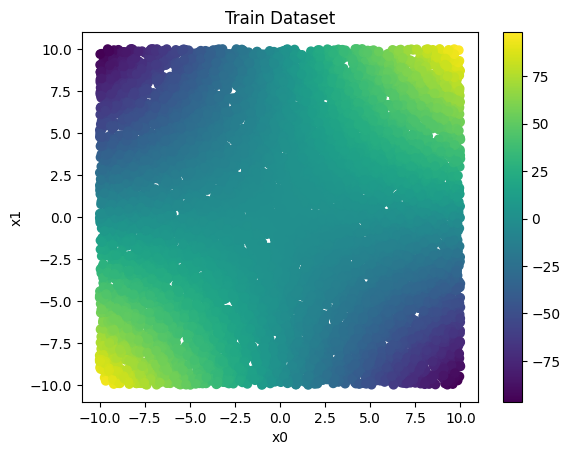

In [3]:
plt.scatter(dataset['train_input'][:, [0]].to('cpu'), dataset['train_input'][:, [1]].to('cpu'),
            c=dataset['train_label'].flatten().to('cpu'), cmap='viridis')
plt.title('Train Dataset')
plt.xlabel('x0')
plt.ylabel('x1')
plt.colorbar()
plt.show()

Let's create a simple KAN model to learn the `xy` function. Simple application of KA theorem give us that the target function can be represented as follows
$$ 
xy(x) = \dfrac{1}{2}\left( \left(x_0 + x_1\right)^2 - x_0^2 - x_1^2 \right)
$$
So a simple `[2, 2, 1]` KAN model should be able to learn this function.

In [4]:
model = KAN(width=[2, 2, 1], grid=3, k=3, device=device).double()

Since we know its explicit form, we can use it to initialize the model.

Best value at boundary.
r2 is 0.7778155016300619
r2 is not very high, please double check if you are choosing the correct symbolic function.
Best value at boundary.
r2 is 0.7818667857820732
r2 is not very high, please double check if you are choosing the correct symbolic function.
r2 is 0.9845802961613811
r2 is 0.9849992195082996
Best value at boundary.
r2 is 0.998739513498373
Best value at boundary.
r2 is 0.997605859034409


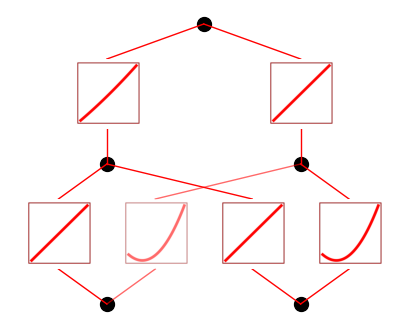

In [5]:
model(dataset['train_input'])
model.fix_symbolic(0, 0, 0, 'x')
model.fix_symbolic(0, 1, 0, 'x')
model.fix_symbolic(0, 0, 1, 'x^2')
model.fix_symbolic(0, 1, 1, 'x^2')
model.fix_symbolic(1, 0, 0, 'x^2')
model.fix_symbolic(1, 1, 0, 'x')
model(dataset['train_input'])
model.plot()

In [ ]:
losses = model.train(dataset=dataset, opt='LBFGS', lr=10., steps=250, device=device)

train loss: 2.02e+01 | test loss: 2.07e+01 | reg: 1.99e+01 :   1%|  | 2/250 [00:02<04:09,  1.01s/it]

After some simple training, we finally have machine precision accuracy.

In [ ]:
plt.plot(losses['train_loss'], label='train loss')
plt.plot(losses['test_loss'], label='test loss')
plt.legend()
plt.yscale('log')
plt.show()

In [ ]:
model(dataset['train_input'])
model.plot()

In [ ]:
model.symbolic_formula(simplify=True)[0][0]